# An Analysis of Paleo to present Climate Change Data

<details>

<summary> Student Details </summary>

| Student| Details |
| -------- | -------- |
| Course: | KDATG_L08_Y1 |
| Author: | Rebecca Hannah Quinn |
| Student Number: | G00425671 |

</details>

---

## Project Goals

To Analyse CO2 vs Temperature Anomaly for the past 800,000 years to the present day.
To examine the change in the polar-ice coverage alongside this.
To examine the changes in Ireland and Irish climate change signals.

In gathering this information and data I will fuse and analyse the data using pandas dataframes and export the results to csv and json formats.

I will be anaylising the data, the trends, the relationships between them including but not limited to: temporal leads, lags, and frequencies. I will also use synthesised data to predict global temperature anomoly over the next few decades and compare to published models of the same to see if atmospherice CO2 trends continue and comment on the accelerated warming based on the latest features with temperatures polar-ice coverage and ocean and sea levels.




<details>

<summary> Table of Contents </summary>

[INTRODUCTION](#01)

[PRE-PROCESSING](#02)

[ANALYSIS](#03)

[PREDICITONS](#04)

[FURTHER COMMENT](#05)

[PLOTS](#06)

</details>

---


## Introduction


There have been studies on the Earth"s climate that have resulted in data as far back as 800,000 years by extracting core samples from deep beneath the ice sheets of Greenland and Antarctica. These samples contain detailed information on air temperature and CO2 levels that are trapped within them. Current polar records demonstrate a close association between atmospheric carbon dioxide and temperature in the natural world. In essence, when one increases, the other one follows.

However, there is still some uncertainty about which occurred first - a spike in temperature or CO2. Until now, the most extensive records to date on a significant change in Earth"s climate came from the EPICA Dome C ice core on the Antarctic Plateau. The data, which covered the end of the last ice age, between 20,000 and 10,000 years ago, indicated that CO2 levels could have lagged behind rising global temperatures by as much as 1,400 years.
[1]: https://www.scientificamerican.com/article/ice-core-data-help-solve/#:~:text=Scientists%20use%20air%20trapped%20in,than%20the%20ice%20surrounding%20them.


<a id="01i">

## Pre-processing

</a>





## Import Packages

In [60]:
#importing packages required for analysis and visualization
import requests
from io import StringIO
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading in the Data

### CO2

#### CO2 Data 1 - NCEI 1855 - 1960

In [61]:
epica1col = ["year", "co2", "sigma"]
epica8kyr1 = pd.read_excel("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2.xls", sheet_name="CO2 Composite", skiprows=59, names=epica1col)
epica8kyr1["year"] = epica8kyr1["year"].astype(int)

# The code below flips the sign of the "year" values and adds 1950 to them. This is useful for converting the "year" values to a specific reference point year 1950. 
# Clarify why the year transformation is done.
# Make sure the data type conversions are necessary.

epica8kyr1["year"] = -1 * epica8kyr1["year"] + 1950
epica8kyr1 = epica8kyr1.sort_values(by="year", ascending=False)
epica8kyr1.to_csv("epica8kyr1.csv", index=False)

#### CO2 Data 2 - Global Monitoring Laboratory - 1959 - 2023

In [62]:
epica2col = ["year", "co2", "unc"]
epica8kyr2 = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv", skiprows=44, sep=",", names=epica2col)

#### CO2 Data 3 - Mauna Lon Observeratory - 1984 - 2023

In [63]:
epica3col = ["year", "co2", "unc"]
url3 = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt"
response = requests.get(url3)
if response.status_code == 200:
    text = response.text
    epica8kyr3 = pd.read_fwf(StringIO(text), names=epica3col, skiprows=45, header=0)
    epica8kyr3 = epica8kyr3.sort_values(by="year", ascending=False)  #corrected
    epica8kyr3.to_csv("epica8kyr3.csv", index=False)

##### Initial Analysis

###### Epica CO2 Data 1

In [64]:
%display epica8kyr1.head() #head function to check first data lines

UsageError: Line magic function `%display` not found.


In [ ]:
epica8kyr1.tail()

,year,co2,sigma
1851,-801975,202.921723,2.064488
1852,-802059,207.498645,0.915083
1853,-802572,204.861938,1.642851
1854,-803182,202.226839,0.689587
1855,-803718,207.285440,2.202808


In [ ]:
epica8kyr1.columns #info and columns for merging

Index(['year', 'co2', 'sigma'], dtype='object')

In [ ]:
epica8kyr1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1856 entries, 0 to 1855
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1856 non-null   int64  
 1   co2     1856 non-null   float64
 2   sigma   1856 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 58.0 KB


---

###### Epica CO2 Data 2

In [ ]:
epica8kyr2.head()

,year,co2,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [ ]:
epica8kyr2.tail()

,year,co2,unc
60,2019,411.66,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12
63,2022,418.53,0.12
64,2023,421.08,0.12


In [ ]:
epica8kyr2.columns

Index(['year', 'co2', 'unc'], dtype='object')

In [ ]:
epica8kyr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    65 non-null     int64  
 1   co2     65 non-null     float64
 2   unc     65 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB


---

###### Epica CO2 Data 3

In [ ]:
epica8kyr3.head()

,year,co2,unc
NaN,2023,1922.53,0.62
NaN,2022,1911.81,0.78
NaN,2021,1895.28,0.55
NaN,2020,1878.93,0.56
NaN,2019,1866.58,0.60


In [ ]:
epica8kyr3.tail()

,year,co2,unc
NaN,1988,1693.11,0.67
NaN,1987,1682.70,0.49
NaN,1986,1670.09,0.74
NaN,1985,1657.29,0.59
NaN,1984,1644.68,0.67


In [ ]:
epica8kyr3.columns

Index(['year', 'co2', 'unc'], dtype='object')

In [ ]:
epica8kyr3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, nan to nan
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    40 non-null     int64  
 1   co2     40 non-null     float64
 2   unc     40 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


---

---

### CH4

#### CH4 Data 1

In [ ]:
colnames = ["year", "ch4", "unc"]
noaach4 = "https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt"

response = requests.get(noaach4)

if response.status_code == 200:
    text = response.text
    noaach4df = pd.read_fwf(StringIO(response.text), names=colnames, widths=[6, 12, 8], skiprows=44, header=0)
    noaach4sort = noaach4df.sort_index(ascending=False)
    noaach4sort.to_csv("noaach4new.csv", index=False)

#### CH4 Data 2

In [ ]:
ch4names = ["year", "ch4"]
ch4data = pd.read_csv("https://climatechange.chicago.gov/sites/production/files/2016-08/ghg-concentrations_fig-2.csv", usecols=[0, 1], skiprows=7, header=0, names=ch4names)
ch4data["year"] = pd.to_numeric(ch4data["year"], errors='coerce')
ch4data = ch4data.dropna(subset=["year"])
ch4data["year"] = ch4data["year"].astype(int)
ch4data.to_csv("ch4data.csv")

##### Initial Analysis

##### CH4 DATA 1

In [ ]:
noaach4sort.head()

,year,ch4,unc
39,2023,1922.53,0.62
38,2022,1911.81,0.78
37,2021,1895.28,0.55
36,2020,1878.93,0.56
35,2019,1866.58,0.60


In [ ]:
noaach4sort.tail()

,year,ch4,unc
4,1988,1693.11,0.67
3,1987,1682.70,0.49
2,1986,1670.09,0.74
1,1985,1657.29,0.59
0,1984,1644.68,0.67


In [ ]:
noaach4sort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 39 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    40 non-null     int64  
 1   ch4     40 non-null     float64
 2   unc     40 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [ ]:
noaach4sort.describe()

,year,ch4,unc
count,40.000000,40.000000,40.000000
mean,2003.500000,1779.660000,0.620000
std,11.690452,66.918839,0.095676
min,1984.000000,1644.680000,0.420000
25%,1993.750000,1740.675000,0.550000
50%,2003.500000,1774.555000,0.630000
75%,2013.250000,1815.700000,0.680000
max,2023.000000,1922.530000,0.820000


In [ ]:
noaach4sort.columns

Index(['year', 'ch4', 'unc'], dtype='object')

##### CH4 DATA 2

In [ ]:
ch4data.head()

,year,ch4
0,-797446,399.3
1,-796467,457.8
2,-795327,396.1
3,-794369,418.0
4,-792988,428.3


In [ ]:
ch4data.tail()

,year,ch4
2203,2011,NaN
2204,2012,NaN
2205,2013,NaN
2206,2014,NaN
2207,2015,NaN


In [ ]:
ch4data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2207 entries, 0 to 2207
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    2207 non-null   int64  
 1   ch4     2103 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 51.7 KB


In [ ]:
ch4data.describe()

,year,ch4
count,2207.000000,2103.000000
mean,-256194.044857,519.952278
std,244220.615987,88.056229
min,-797446.000000,342.400000
25%,-417824.500000,449.850000
50%,-203931.000000,508.666667
75%,-33459.500000,589.395389
max,2015.000000,907.000000


In [ ]:
ch4data.columns

Index(['year', 'ch4'], dtype='object')

---

---

### Temperature

#### Temperature Data 1

In [ ]:
epicadeut = "https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt"

response = requests.get(epicadeut)

if response.status_code == 200:
    text = response.text
    epicadeutdf = pd.read_csv(StringIO(text), sep='\s+', skiprows=89, header=0)
    epicadeutdf.rename(columns={"Age": "year"}, inplace=True)
    epicadeutdf.rename(columns={"Temperature": "temp"}, inplace=True)
    epicadeutdf["year"] = epicadeutdf["year"].astype(int)
    epicadeutdf["year"] = -1 * epicadeutdf["year"] + 1950
    epicadeutdf["temp"] = epicadeutdf["temp"] + (-54.5)
    
    epicacols = epicadeutdf.iloc[:, [2, 4]]

epicacols.to_csv("epicadeut.csv", index=False)

#### Temperature Data 2

In [ ]:
noaanames=["year", "temp"]
noaatemp = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/antarctic/land_ocean/12/11/1850-2023/data.csv", skiprows=5, names=noaanames, header=0)
noaatemp["temp"] = pd.to_numeric(noaatemp["temp"], errors="coerce")
noaatemp["temp"] = noaatemp["temp"] + (-54.5)
noaasort = noaatemp.sort_values(by="year", ascending=False)
noaasort.to_csv("noaatemp.csv", index=False)

##### Initital Analysis

In [ ]:
epicacols.head()

,year,temp
0,2000,NaN
1,1993,NaN
2,1987,NaN
3,1981,NaN
4,1974,NaN


In [ ]:
epicacols.tail()

,year,temp
5795,-795458,-63.23
5796,-796493,-63.04
5797,-797551,-63.38
5798,-798639,-63.42
5799,-799712,-63.32


In [ ]:
epicacols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    5800 non-null   int64  
 1   temp    5785 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 90.8 KB


In [ ]:
epicacols.describe()

,year,temp
count,5800.000000,5785.000000
mean,-188065.971207,-59.080228
std,192546.358262,3.446971
min,-799712.000000,-65.080000
25%,-270506.250000,-61.950000
50%,-119843.000000,-59.700000
75%,-44380.000000,-56.320000
max,2000.000000,-49.040000


In [ ]:
epicacols.columns

Index(['year', 'temp'], dtype='object')

---

In [ ]:
noaasort.head()

,year,temp
171,2023,-54.26
170,2022,-54.11
169,2021,-54.39
168,2020,-54.01
167,2019,-54.19


In [ ]:
noaasort.tail()

,year,temp
4,1856,-54.53
3,1855,-54.48
2,1854,-54.56
1,1853,-54.57
0,1852,-54.57


In [ ]:
noaasort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 172 entries, 171 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    172 non-null    int64  
 1   temp    172 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


In [ ]:
noaasort.describe()

,year,temp
count,172.000000,172.000000
mean,1937.500000,-54.470988
std,49.796252,0.209660
min,1852.000000,-55.010000
25%,1894.750000,-54.600000
50%,1937.500000,-54.500000
75%,1980.250000,-54.370000
max,2023.000000,-53.820000


In [ ]:
noaasort.columns

Index(['year', 'temp'], dtype='object')

---

---


---



### Initial Data Adjustments

#### Data Clean-up

In [ ]:
epica8kyr2["year"] = epica8kyr2["year"].astype(int) #change data within the year column to an integer
epica8kyr2 = epica8kyr2.sort_values(by="year", ascending=False)  #sort column by year
epica8kyr2.to_csv("epica8kyr2.csv", index=False) #save to csv

##### CO2 - Merge Data

In [ ]:
mergeddata = pd.merge(epica8kyr3, epica8kyr2, on=["year", "co2", "unc"], how="outer")
mergeddata = pd.merge(mergeddata, epica8kyr1, on=["year", "co2"], how="outer")

mergeddata.to_csv("mergedco2data.csv", index=False)
mergeddata.columns #check columns merged correctly

#### CH4

##### CH4 - Merge Data

In [ ]:
mergech4 = pd.merge(ch4data, noaach4sort, on=["year", "ch4"], how="outer")
mergech4.to_csv("mergedch4.csv", index=False)

In [ ]:
mergech4.columns

#### Temperature

##### Temperature - Merge Data

In [ ]:
mergetemp = pd.merge(noaasort, epicacols, on=["year", "temp"], how="outer")
mergetemp.to_csv("tempsmerge.csv", index=False)

In [ ]:
mergetemp.head()

In [ ]:
mergetemp.shape #check the merge went correctly

### Statistical Measurement

### CO2

In [ ]:
mean_value = mergeddata["co2"].mean()
print(f"CO2 Data Mean Value: {mean_value}")

median_value = mergeddata["co2"].median()
print(f"CO2 Data Median Value: {median_value}")

std_deviation = mergeddata["co2"].std()
print(f"CO2 Data Standard Deviation: {std_deviation}")

correlation = mergeddata["co2"].corr(mergeddata["year"])
print(f"CO2 Data Standard Deviation: {correlation}")

### CH4

In [ ]:
mean_value = mergech4["ch4"].mean()
print(f"CH4 Data Mean Value: {mean_value}")

median_value = mergech4["ch4"].median()
print(f"CH4 Data Median Value: {median_value}")

std_deviation = mergech4["ch4"].std()
print(f"CH4 Data Standard Deviation: {std_deviation}")

correlation = mergech4["ch4"].corr(mergech4["year"])
print(f"CH4 Data Standard Deviation: {correlation}")

### TEMPERATURE

In [ ]:
mean_value = mergetemp["temp"].mean()
print(f"Temp Data Mean Value: {mean_value}")

median_value = mergetemp["temp"].median()
print(f"Temp Data Median Value: {median_value}")

std_deviation = mergetemp["temp"].std()
print(f"Temp Data Standard Deviation: {std_deviation}")

correlation = mergetemp["temp"].corr(mergetemp["year"])
print(f"Temp Data Standard Deviation: {correlation}")

## Irish Context

/var/folders/bn/xqdgg_35477_8nvxrj84pj300000gn/T/ipykernel_46166/853563107.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weatherstations["open year "] = pd.to_datetime(weatherstations["open year "], errors='coerce')


,county,station name,name,height(m),easting,northing,latitude,longitude,open year,close year
613,Dublin,1723,DUBLIN (Phoenix Park),49,310000,236100,53.36389,-6.34722,1829-01-01,2003
1784,Waterford,1612,PORTLAW (Mayfield),8,246600,115200,52.28611,-7.31667,1841-01-01,1994
616,Dublin,1823,DUBLIN (Glasnevin),21,315175,236910,53.37000,-6.27028,1860-01-01,(null)
1597,Sligo,636,MARKREE CASTLE,39,170300,325200,54.17500,-8.45556,1860-01-01,1998
1504,Offaly,119,BIRR CASTLE,56,205000,204900,53.09444,-7.92500,1862-01-01,1939
277,Cork,904,CORK (UNIV.COLL.),17,166300,71300,51.89306,-8.49028,1862-01-01,1994
787,Galway,5927,NUIG,9,129078,225617,53.27639,-9.06389,1864-01-01,1952
897,Kerry,305,VALENTIA OBSERVATORY (Manual),24,45799,78549,51.93806,-10.24333,1866-01-01,2012
1960,Wexford,116,GOREY (Courtown House),16,319800,157200,52.65278,-6.22917,1866-01-01,1958
13,Carlow,1414,BAGENALSTOWN (FENAGH HSE.),106,277400,161300,52.69722,-6.85556,1866-01-01,1986


,year,month,ind,rain,gdf,rd,wd
0,1941,1,0,161.6,27.4,17,15
1,1941,2,0,120.9,22.6,21,16
2,1941,3,0,81.2,27.2,17,13
3,1941,4,0,33.4,7.9,11,9
4,1941,5,0,68.9,15.2,14,12
5,1941,6,0,15.1,4.1,8,5
6,1941,7,0,71.3,19.1,16,10
7,1941,8,0,57.2,9.1,18,16
8,1941,9,0,19.5,8.1,7,5
9,1941,10,0,90.7,21.3,17,11


,year,rain
0,1941,969.5
1,1942,942.8
2,1943,1032.4
3,1944,974.4
4,1945,1023.8
5,1946,1193.1
6,1947,1266.1
7,1948,1157.5
8,1949,752.6
9,1950,1054.7


### Temperature

In [65]:
sherkintemp = pd.read_csv("DATA Files/mly775.csv")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


### Rainfall

In [ ]:
weatherstations = pd.read_csv("DATA Files/weatherstationdata.csv")

weatherstations.columns
#to find the oldest weather station in the country that is still open to get a larger set of data
weatherstations["open year "] = pd.to_datetime(weatherstations["open year "], errors='coerce')

weatherstationsoldest = weatherstations.sort_values(by="open year ")
weatherstationsoldest.head(25)

# I will use Foukesmill Station 108 for this as the records start in 1943 to present 

In [ ]:
station108 = pd.read_csv("DATA Files/mly108-foulkesmill1873.csv")

station108.head(14)
# testing the csv was read correctly

In [ ]:
yearlyrainfall = station108.groupby('year')['rain'].sum().reset_index()

yearlyrainfall.head(14) #testing groubed by worked for each year/month



---

## Analysis



### Plot Overview

In [ ]:
years = mergeddata["year"]
co2values = mergeddata["co2"]
ch4values = mergech4["ch4"]
tempvalues = mergetemp["temp"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

sns.lineplot(x=years, y=tempvalues, ax=ax1, label="Temp")
sns.lineplot(x=years, y=co2values, ax=ax2, label="CO2")
sns.lineplot(x=years, y=ch4values, ax=ax2, label="CH4")

fig.suptitle("CO2 and CH4 Over Years")
ax1.set_xlabel("Year")

ax1.set_ylabel("Temp")
ax2.set_ylabel("CO2")
ax2.set_ylabel("CH4")

ax1.legend()
ax2.legend()

plt.tight_layout()

plt.show()


### CO2 - Plots

In [ ]:
plt.figure(figsize=(18, 16))
plt.plot(mergeddata["year"], mergeddata["co2"], color="blue")
plt.xlabel("YEAR", fontsize=20)
plt.ylabel("CO2", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("CO2 V Time", fontsize=20)
plt.tight_layout()
plt.savefig("lineplot1.png")
#### Plot
#SNS Lineplot
#style
sns.set_style("whitegrid")
sns.set_context("paper") 

In [ ]:
plt.figure(figsize=(16, 12))

#lineplot
sns.lineplot(data=mergeddata, x="year", y="co2", color="green")

#labels
plt.xlabel("Year", fontsize=14)
plt.ylabel("CO2 Levels", fontsize=14)
plt.title("CO2 Levels Over Time", fontsize=14)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)


plt.tight_layout()  #additional spacing
plt.savefig("snslineplotnew.png")

### CH4 - Plots

In [ ]:
#style
sns.set_style("whitegrid")
sns.set_context("paper")

#size
plt.figure(figsize=(16, 12))

#lineplot
sns.lineplot(data=mergech4, x="year", y="ch4", color="blue")

#labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("CH4", fontsize=12)
plt.title("CH4 Levels", fontsize=14)
plt.xticks(rotation=45)

#ticks spacing
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()  #additional spacing
plt.savefig("ch4levels2.png")

In [ ]:
plt.figure(figsize=(16, 12))
#lineplot
sns.lineplot(data=mergech4, x="year", y="ch4", color="blue")

#labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("CH4", fontsize=12)
plt.title("CH4 Levels", fontsize=14)
plt.xticks(rotation=45)

#ticks spacing
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()  #additional spacing
plt.savefig("ch4levels2.png")

In [ ]:
plt.figure(figsize=(16, 12))
#selection of data for demonstration

sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=mergeddata, x="year", y="co2", label="CO2")
sns.lineplot(data=ch4data, x="year", y="ch4", label="Mean CH4")

plt.title("CO2 and Mean CH4 from 8kyr before present")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()

### Temperature - Plots

In [ ]:
plt.figure(figsize=(16, 12))
#selection of data for demonstration

sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=mergeddata, x="year", y="co2", label="CO2")

plt.title("CO2")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(16, 12))
#selection of data for demonstration

sns.set_style("whitegrid")
sns.set_context("notebook")

sns.lineplot(data=mergetemp, x="year", y="temp", label="Temp")

plt.title("Temperature")
plt.xlabel("Year")
plt.ylabel("Value")

plt.legend()

plt.show()

### Rainfall - Plots

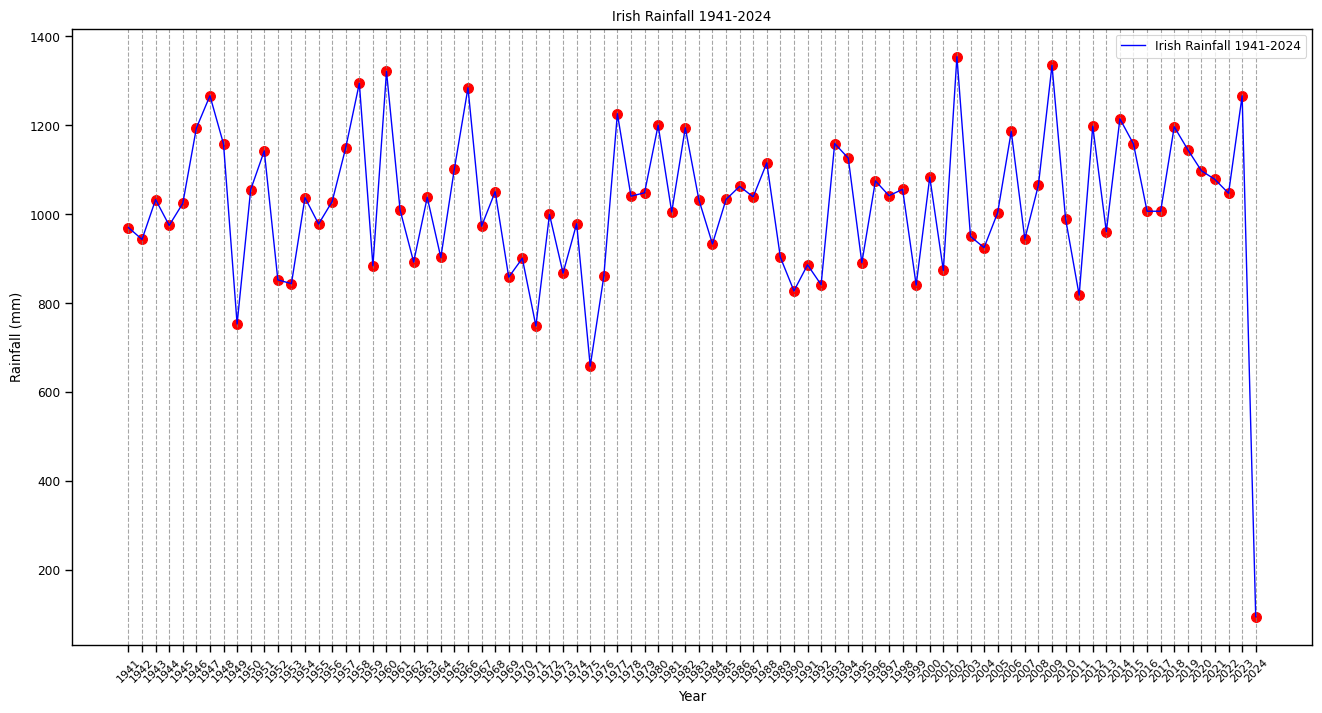

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(yearlyrainfall["year"], yearlyrainfall["rain"], label="Irish Rainfall 1941-2024", color="blue", linewidth=1)
plt.scatter(yearlyrainfall["year"], yearlyrainfall["rain"], color="red", edgecolor="red", s=50, marker='o')

plt.xticks(yearlyrainfall["year"], rotation=45, fontsize=8)

plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Irish Rainfall 1941-2024")
plt.grid(axis='x', linestyle='--', color='gray', alpha=0.7)

plt.legend()

### Trends


### Relationships



---

<a id="03i">

## Predictions

</a>

### Synthetic Data


### Comparisons with Published Climate Models

In [ ]:
#SECTION 3 - PYTHON CELL



---

<a id="07i">

## REFERENCES

</a>


---